# Auto Price Data analysis (Code)

In [34]:
import pandas as pd
import numpy as np

## 1. Research Question
Do cars with different body styles (convertible, sedan, hatchback, wagon, hardtop) show systematic differences in price distributions?

## 2. Data Description

In [35]:
Price_df = pd.read_csv('auto_price.csv', na_values=['?','NA','NaN','na'])


In [66]:
# Shape
Price_df.shape

(18286, 24)

In [67]:
Price_df.head(10)

Unnamed: 0 Make_Model      Body_Type      Price             Vat  \
0           0    Audi A1         Sedans   $15770.0             NaN   
1           1    Audi A1         Sedans        NaN             NaN   
2           2    Audi A1         Sedans   $14640.0             NaN   
3           3    Audi A1            NaN        NaN             NaN   
4           4    Audi A1         Sedans   $16790.0             NaN   
5           5    Audi A1         Sedans   $15090.0  VAT deductible   
6           6    Audi A1  Station wagon   $16422.0  VAT deductible   
7           7    Audi A1        Compact        NaN  VAT deductible   
8           8    Audi A1         Sedans        NaN             NaN   
9           9        NaN            NaN  €16730.70  VAT deductible   

       Mileage  Type     Fuel  Gears  \
0  34804.85 mi  Used      NaN    NaN   
1   80000.0 km   NaN  Benzine    7.0   
2  51853.41 mi  Used   Diesel    7.0   
3  45360.08 mi  Used   Diesel    6.0   
4   16200.0 km  Used   Diesel    7.0   
5  39561.45 mi   NaN   Diesel    7.0   
6  38593.97 mi  Used   Diesel    7.0   
7   14986.0 km  Used   Diesel    7.0   
8          NaN   NaN      NaN    7.0   
9   16103.0 km  Used  Benzine    7.0   

                                 Comfort_Convenience  ... Previous_Owners  \
0  Air conditioning,Armrest,Automatic climate con...  ...             NaN   
1  Air conditioning,Automatic climate control,Hil...  ...             1.0   
2  Air conditioning,Cruise control,Electrical sid...  ...             NaN   
3  Air suspension,Armrest,Auxiliary heating,Elect...  ...             1.0   
4  Air conditioning,Armrest,Automatic climate con...  ...             NaN   
5  Air conditioning,Armrest,Automatic climate con...  ...             NaN   
6                                                NaN  ...             1.0   
7  Air conditioning,Armrest,Electrical side mirro...  ...             NaN   
8                                                NaN  ...             NaN   
9  Air conditioning,Armrest,Automatic climate con...  ...             1.0   

  Horsepower Inspection_New  Paint_Type  Upholstery_Type Gearing_Type  \
0    66.0 kW            1.0         NaN              NaN    Automatic   
1   141.0 kW            0.0         NaN              NaN    Automatic   
2    85.0 kW            0.0         NaN              NaN    Automatic   
3    66.0 kW            0.0    Metallic              NaN    Automatic   
4    66.0 kW            NaN         NaN              NaN    Automatic   
5    85.0 kW            0.0    Metallic              NaN    Automatic   
6    85.0 kW            NaN    Metallic              NaN    Automatic   
7    66.0 kW            1.0         NaN              NaN    Automatic   
8    85.0 kW            0.0         NaN              NaN    Automatic   
9    70.0 kW            NaN         NaN            Cloth    Automatic   

   Displacement       Weight Drive_Chain Cons_Comb  
0     1422.0 cc    1220.0 kg       front       NaN  
1           NaN  2766.80 lbs       front       5.6  
2           NaN  2502.24 lbs         NaN       NaN  
3           NaN    1195.0 kg         NaN       3.8  
4           NaN    1135.0 kg         NaN       4.1  
5           NaN  2502.24 lbs       front       3.5  
6     1598.0 cc  2634.52 lbs       front       3.7  
7     1422.0 cc  2601.45 lbs       front       3.7  
8           NaN          NaN         NaN       NaN  
9      999.0 cc  2502.24 lbs       front       NaN  

[10 rows x 24 columns]

In [68]:
#  Attributes
Price_df.columns

Index(['Unnamed: 0', 'Make_Model', 'Body_Type', 'Price', 'Vat', 'Mileage',
       'Type', 'Fuel', 'Gears', 'Comfort_Convenience', 'Entertainment_Media',
       'Extras', 'Safety_Security', 'Age', 'Previous_Owners', 'Horsepower',
       'Inspection_New', 'Paint_Type', 'Upholstery_Type', 'Gearing_Type',
       'Displacement', 'Weight', 'Drive_Chain', 'Cons_Comb'],
      dtype='object')

In [69]:
# Missing values
Price_df.isnull().sum()

Unnamed: 0                 0
Make_Model              2194
Body_Type               2194
Price                   3291
Vat                     6400
Mileage                 1645
Type                    3840
Fuel                    7131
Gears                   5120
Comfort_Convenience     4205
Entertainment_Media     9691
Extras                 15543
Safety_Security        13165
Age                     1280
Previous_Owners         8411
Horsepower              1280
Inspection_New          6400
Paint_Type             10423
Upholstery_Type        15177
Gearing_Type            1280
Displacement            4937
Weight                  2011
Drive_Chain             6034
Cons_Comb               5851
dtype: int64

In [70]:
missing = Price_df.isna().sum().to_frame("missing_val")
missing["missing_ratio"] = missing["missing_val"] / len(Price_df)
missing.sort_values("missing_ratio", ascending=False).head(15)

missing_val  missing_ratio
Extras                     15543       0.849995
Upholstery_Type            15177       0.829979
Safety_Security            13165       0.719950
Paint_Type                 10423       0.569999
Entertainment_Media         9691       0.529968
Previous_Owners             8411       0.459969
Fuel                        7131       0.389970
Vat                         6400       0.349995
Inspection_New              6400       0.349995
Drive_Chain                 6034       0.329979
Cons_Comb                   5851       0.319972
Gears                       5120       0.279996
Displacement                4937       0.269988
Comfort_Convenience         4205       0.229957
Type                        3840       0.209997

In [71]:
# Numeric columns
num_cols = Price_df.select_dtypes(include=[np.number]).columns.tolist()

# Categorical columns
cat_cols = [c for c in Price_df.columns if c not in num_cols]

num_cols, cat_cols[:10]

(['Unnamed: 0',
  'Gears',
  'Age',
  'Previous_Owners',
  'Inspection_New',
  'Cons_Comb'],
 ['Make_Model',
  'Body_Type',
  'Price',
  'Vat',
  'Mileage',
  'Type',
  'Fuel',
  'Comfort_Convenience',
  'Entertainment_Media',
  'Extras'])

In [72]:
def summarize_categorical(series, top_k=10):
    counts = series.dropna().astype(str).value_counts()
    return { "unique_count": counts.shape[0],"top_values": counts.head(top_k).to_dict()}

category_overview = {col: summarize_categorical(Price_df[col]) for col in cat_cols}
pd.DataFrame(category_overview).T.sort_values("unique_count", ascending=False).head(20)

unique_count  \
Mileage                     7507   
Comfort_Convenience         5289   
Price                       4541   
Safety_Security             1940   
Weight                       922   
Entertainment_Media          290   
Extras                       267   
Horsepower                    84   
Displacement                  64   
Make_Model                     9   
Body_Type                      8   
Type                           5   
Fuel                           4   
Paint_Type                     3   
Gearing_Type                   3   
Drive_Chain                    3   
Upholstery_Type                2   
Vat                            2   

                                                            top_values  
Mileage              {'10.0 km': 587, '1647.3626086956522 km': 539,...  
Comfort_Convenience  {'Air conditioning,Electrical side mirrors,Hil...  
Price                {'$10990.0': 76, '$15990.0': 75, '$14990.0': 6...  
Safety_Security      {'ABS,Central door lock,Daytime running lights...  
Weight               {'1163.0 kg': 903, '1360.0 kg': 796, '1487.0 k...  
Entertainment_Media  {'Bluetooth,Hands-free equipment,On-board comp...  
Extras               {'Alloy wheels': 978, 'Alloy wheels,Touch scre...  
Horsepower           {'85.0 kW': 2710, '66.0 kW': 2295, '81.0 kW': ...  
Displacement         {'1598.0 cc': 4265, '999.0 cc': 2094, '1398.0 ...  
Make_Model           {'Audi A3': 3140, 'Opel Insignia': 2643, 'Audi...  
Body_Type            {'Sedans': 8078, 'Station wagon': 3733, 'Compa...  
Type                 {'Used': 10073, 'New': 1510, 'Pre-registered':...  
Fuel                 {'Benzine': 5979, 'Diesel': 5135, 'LPG/CNG': 3...  
Paint_Type           {'Metallic': 7509, 'Uni/basic': 335, 'Perl eff...  
Gearing_Type         {'Manual': 8698, 'Automatic': 7811, 'Semi-auto...  
Drive_Chain                    {'front': 12086, '4WD': 162, 'rear': 4}  
Upholstery_Type              {'Cloth': 2411, 'Part/Full Leather': 698}  
Vat                  {'VAT deductible': 11234, 'Price negotiable': ...

## 3. Data Cleaning and Processing

In [73]:
clean = Price_df.copy()

In [74]:
import re

In [75]:
clean = clean.drop(columns=["Unnamed: 0"])

In [77]:
# transfer unit
def parse_mileage(x):
    if pd.isna(x):
        return np.nan
    
    s = str(x).lower().strip().replace(',', '')
    m = re.match(r"(\d+(\.\d+)?).*\s*(km|mi)", s)
    
    if m:
        value = float(m.group(1))
        unit = m.group(3)
        if unit == "mi":
            value *= 1.609344
        return value
    
    m_num = re.match(r"(\d+(\.\d+)?)", s)
    if m_num:
        return float(m_num.group(1))
    
    return np.nan

In [78]:
clean["Mileage_km"] = clean["Mileage"].apply(parse_mileage)

In [79]:
clean = clean.drop(columns=["Mileage"], errors="ignore")

In [84]:
# clean price
EUR_TO_USD = 1.10
GBP_TO_USD = 1.27

def convert_to_usd(price):
    if pd.isna(price):
        return np.nan
    
    price_str = str(price).strip()

    if price_str.lower() in ['nan', 'na', '?', '']:
        return np.nan

    if '€' in price_str:
        number = price_str.replace('€', '').strip()
        return abs(float(number)) * EUR_TO_USD
    
    elif '£' in price_str:
        number = price_str.replace('£', '').strip()
        return abs(float(number)) * GBP_TO_USD
    
    elif '$' in price_str:
        number = price_str.replace('$', '').strip()
        return abs(float(number))
    
    else:
        try:
            return abs(float(price_str))
        except ValueError:
            return np.nan

In [85]:
clean["Price"] =clean["Price"].apply(convert_to_usd)

In [86]:
clean["Comfort_Convenience_list"] = Price_df["Comfort_Convenience"].dropna().apply(lambda x: [s.strip() for s in str(x) .split(",")])

In [87]:
clean

Make_Model      Body_Type    Price             Vat  Type     Fuel  \
0            Audi A1         Sedans  15770.0             NaN  Used      NaN   
1            Audi A1         Sedans      NaN             NaN   NaN  Benzine   
2            Audi A1         Sedans  14640.0             NaN  Used   Diesel   
3            Audi A1            NaN      NaN             NaN  Used   Diesel   
4            Audi A1         Sedans  16790.0             NaN  Used   Diesel   
...              ...            ...      ...             ...   ...      ...   
18281     Opel Astra            NaN  12490.0  VAT deductible  Used   Diesel   
18282        Audi A1         Sedans      NaN             NaN  Used  Benzine   
18283        Audi A3          Coupe  16990.0             NaN   NaN   Diesel   
18284  Opel Insignia  Station wagon      NaN             NaN  Used   Diesel   
18285        Audi A1         Sedans      NaN  VAT deductible   NaN  Benzine   

       Gears                                Comfort_Convenience  \
0        NaN  Air conditioning,Armrest,Automatic climate con...   
1        7.0  Air conditioning,Automatic climate control,Hil...   
2        7.0  Air conditioning,Cruise control,Electrical sid...   
3        6.0  Air suspension,Armrest,Auxiliary heating,Elect...   
4        7.0  Air conditioning,Armrest,Automatic climate con...   
...      ...                                                ...   
18281    6.0                                                NaN   
18282    7.0  Air conditioning,Auxiliary heating,Electrical ...   
18283    7.0  Air conditioning,Armrest,Automatic climate con...   
18284    NaN  Air conditioning,Armrest,Automatic climate con...   
18285    NaN  Air conditioning,Armrest,Automatic climate con...   

                                     Entertainment_Media  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4      Bluetooth,CD player,Hands-free equipment,MP3,O...   
...                                                  ...   
18281                                                NaN   
18282  Bluetooth,CD player,Hands-free equipment,MP3,O...   
18283                                                NaN   
18284                                                NaN   
18285                                                NaN   

                                                  Extras  ... Inspection_New  \
0                                                    NaN  ...            1.0   
1      Alloy wheels,Sport seats,Sport suspension,Voic...  ...            0.0   
2                             Alloy wheels,Voice Control  ...            0.0   
3                                                    NaN  ...            0.0   
4                                                    NaN  ...            NaN   
...                                                  ...  ...            ...   
18281                                                NaN  ...            0.0   
18282                                                NaN  ...            0.0   
18283                                                NaN  ...            0.0   
18284                                                NaN  ...            0.0   
18285                                                NaN  ...            NaN   

       Paint_Type  Upholstery_Type Gearing_Type  Displacement       Weight  \
0             NaN              NaN    Automatic     1422.0 cc    1220.0 kg   
1             NaN              NaN    Automatic           NaN  2766.80 lbs   
2             NaN              NaN    Automatic           NaN  2502.24 lbs   
3        Metallic              NaN    Automatic           NaN    1195.0 kg   
4             NaN              NaN    Automatic           NaN    1135.0 kg   
...           ...              ...          ...           ...          ...   
18281         NaN           

In [88]:
# Map body types
if "Body_Type" in clean.columns:
    body_map = {"Convertible": "convertible","Sedans": "sedan","Station wagon": "wagon","Compact": "hatchback","Coupe": "hardtop"}
    clean["Body_Type"] = clean["Body_Type"].map(body_map)

In [89]:
print(clean.columns.tolist())

['Make_Model', 'Body_Type', 'Price', 'Vat', 'Type', 'Fuel', 'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security', 'Age', 'Previous_Owners', 'Horsepower', 'Inspection_New', 'Paint_Type', 'Upholstery_Type', 'Gearing_Type', 'Displacement', 'Weight', 'Drive_Chain', 'Cons_Comb', 'Mileage_km', 'Comfort_Convenience_list']


In [90]:
# Drop rows
required = [c for c in ["Price", "Body_Type"] if c in clean.columns]
clean = clean.dropna(subset=required)

In [91]:
print("Shape after cleaning:", clean.shape)
clean.head()

Shape after cleaning: (12416, 24)


Make_Model Body_Type    Price             Vat  Type    Fuel  Gears  \
0    Audi A1     sedan  15770.0             NaN  Used     NaN    NaN   
2    Audi A1     sedan  14640.0             NaN  Used  Diesel    7.0   
4    Audi A1     sedan  16790.0             NaN  Used  Diesel    7.0   
5    Audi A1     sedan  15090.0  VAT deductible   NaN  Diesel    7.0   
6    Audi A1     wagon  16422.0  VAT deductible  Used  Diesel    7.0   

                                 Comfort_Convenience  \
0  Air conditioning,Armrest,Automatic climate con...   
2  Air conditioning,Cruise control,Electrical sid...   
4  Air conditioning,Armrest,Automatic climate con...   
5  Air conditioning,Armrest,Automatic climate con...   
6                                                NaN   

                                 Entertainment_Media  \
0                                                NaN   
2                                                NaN   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   
5                                                NaN   
6  Bluetooth,CD player,Hands-free equipment,On-bo...   

                                              Extras  ... Inspection_New  \
0                                                NaN  ...            1.0   
2                         Alloy wheels,Voice Control  ...            0.0   
4                                                NaN  ...            NaN   
5                                                NaN  ...            0.0   
6  Alloy wheels,Sport package,Sport seats,Sport s...  ...            NaN   

   Paint_Type  Upholstery_Type Gearing_Type  Displacement       Weight  \
0         NaN              NaN    Automatic     1422.0 cc    1220.0 kg   
2         NaN              NaN    Automatic           NaN  2502.24 lbs   
4         NaN              NaN    Automatic           NaN    1135.0 kg   
5    Metallic              NaN    Automatic           NaN  2502.24 lbs   
6    Metallic              NaN    Automatic     1598.0 cc  2634.52 lbs   

  Drive_Chain Cons_Comb    Mileage_km  \
0       front       NaN  56012.976518   
2         NaN       NaN  83449.974263   
4         NaN       4.1  16200.000000   
5       front       3.5  63667.982189   
6       front       3.7  62110.974056   

                            Comfort_Convenience_list  
0  [Air conditioning, Armrest, Automatic climate ...  
2  [Air conditioning, Cruise control, Electrical ...  
4  [Air conditioning, Armrest, Automatic climate ...  
5  [Air conditioning, Armrest, Automatic climate ...  
6                                                NaN  

[5 rows x 24 columns]

In [92]:
# validation 
print("Price statistics:")
print(clean["Price"].describe())
print("\nBody_Type distribution:")
print(clean["Body_Type"].value_counts())
print(f"\nCleaned data shape: {clean.shape}")
print(f"Price missing values: {clean['Price'].isnull().sum()}")

Price statistics:
count     12416.000000
mean      17749.625178
std        8847.123307
min        4950.000000
25%       12777.270000
50%       16777.200000
75%       21490.000000
max      274427.747000
Name: Price, dtype: float64

Body_Type distribution:
Body_Type
sedan          6589
wagon          3074
hatchback      2720
hardtop          24
convertible       9
Name: count, dtype: int64

Cleaned data shape: (12416, 24)
Price missing values: 0


In [93]:
clean.to_csv('cleaned_auto_price.csv', index=False)

## 4. Exploratory Data Analysis

In [96]:
# EDA
import matplotlib.pyplot as plt

In [97]:
#  Simple grouped stats 
group_summary = (clean.groupby("Body_Type")["Price"].agg(["count", "mean", "median"]).sort_values("median", ascending=False))
group_summary

count          mean     median
Body_Type                                  
convertible      9  28888.996689  30178.500
sedan         6589  18200.922241  17841.120
wagon         3074  18966.043213  17646.750
hatchback     2720  15279.255611  14539.899
hardtop         24  13844.854250  12470.000

## 4.1 Numerical Variables 

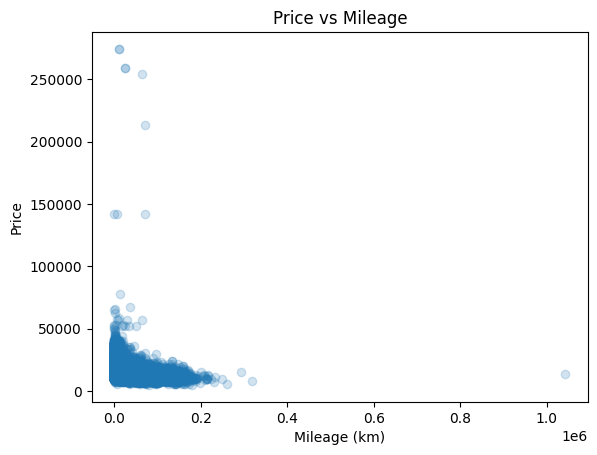

In [98]:
# Price vs Mileage scatterplot
if "Mileage_km" in clean.columns:
    plt.figure()
    plt.scatter(clean["Mileage_km"], clean["Price"], alpha=0.2)
    plt.xlabel("Mileage (km)")
    plt.ylabel("Price")
    plt.title("Price vs Mileage")
    plt.show()

C:\Users\11727\AppData\Local\Temp\ipykernel_15988\1618052720.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[str(a) for a in top_ages], showfliers=True)


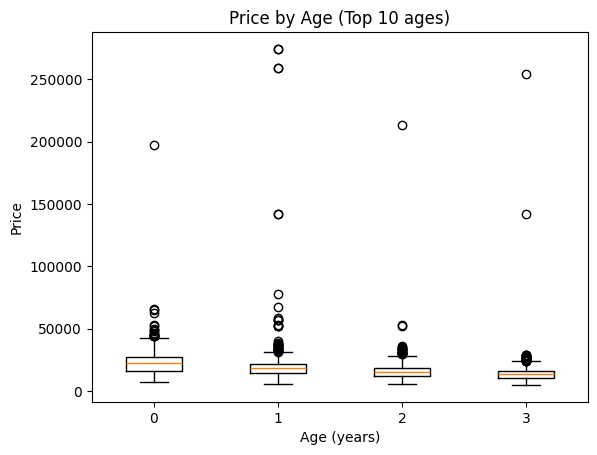

In [100]:
# Price vs Age boxplot
if "Age" in clean.columns:
    # show top 10 age buckets
    ages = clean["Age"].dropna().astype(int)
    top_ages = sorted(ages.value_counts().index[:10])
    groups = [clean.loc[clean["Age"]==a, "Price"].dropna().values for a in top_ages]
    plt.figure()
    plt.boxplot(groups, labels=[str(a) for a in top_ages], showfliers=True)
    plt.xlabel("Age (years)")
    plt.ylabel("Price")
    plt.title("Price by Age (Top 10 ages)")
    plt.show()

## 4.2 Categorical Variables

C:\Users\11727\AppData\Local\Temp\ipykernel_15988\250739598.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[b.title() for b in order], showfliers=True)


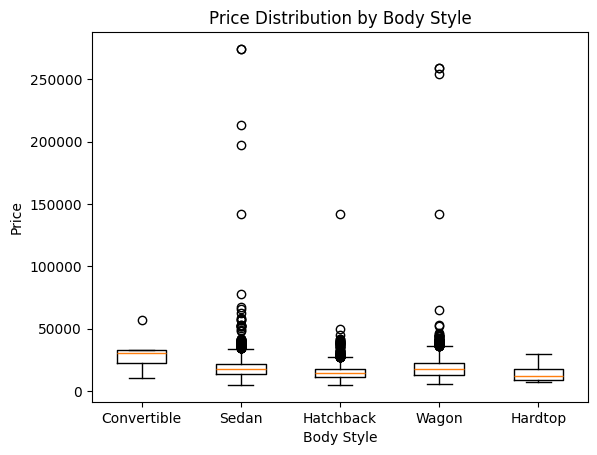

In [101]:
# Price vs Body_Type boxplot 
order = [b for b in ["convertible","sedan","hatchback","wagon","hardtop"] if (clean["Body_Type"]==b).any()]
data = [clean.loc[clean["Body_Type"]==b, "Price"].dropna().values for b in order]

plt.figure()
plt.boxplot(data, labels=[b.title() for b in order], showfliers=True)
plt.xlabel("Body Style")
plt.ylabel("Price")
plt.title("Price Distribution by Body Style")
plt.show()

Detected Fuel column: Fuel
Detected Price column: Price


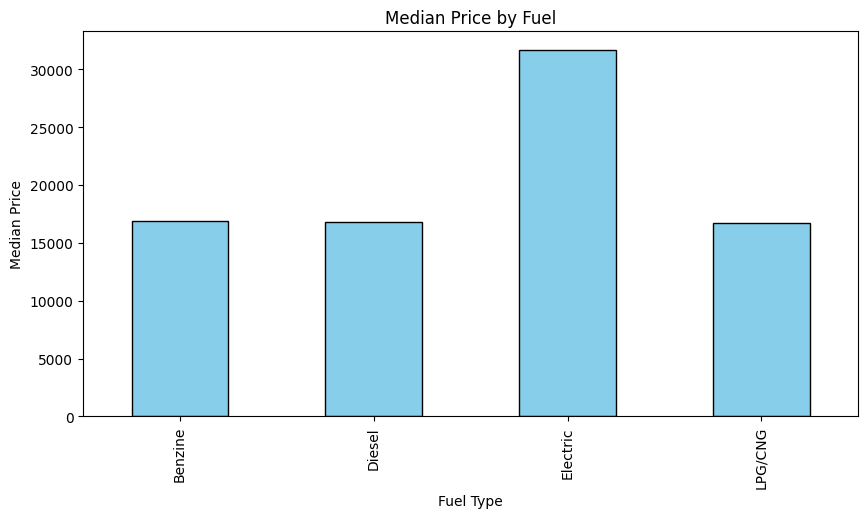

In [102]:
# Median Price by Fuel barplot
fuel_col = [c for c in clean.columns if "fuel" in c.lower()][0]
price_col = [c for c in clean.columns if "price" in c.lower()][0]

print("Detected Fuel column:", fuel_col)
print("Detected Price column:", price_col)

median_price_by_fuel = clean.groupby(fuel_col)[price_col].median()

plt.figure(figsize=(10, 5))
median_price_by_fuel.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Fuel Type")
plt.ylabel("Median Price")
plt.title("Median Price by Fuel")
plt.show()


## 4.3 Correlation Heatmap

In [103]:
import seaborn as sns

In [42]:
numeric_cols = clean.select_dtypes(include=["int64", "float64"])

In [43]:
corr_matrix = numeric_cols.corr()

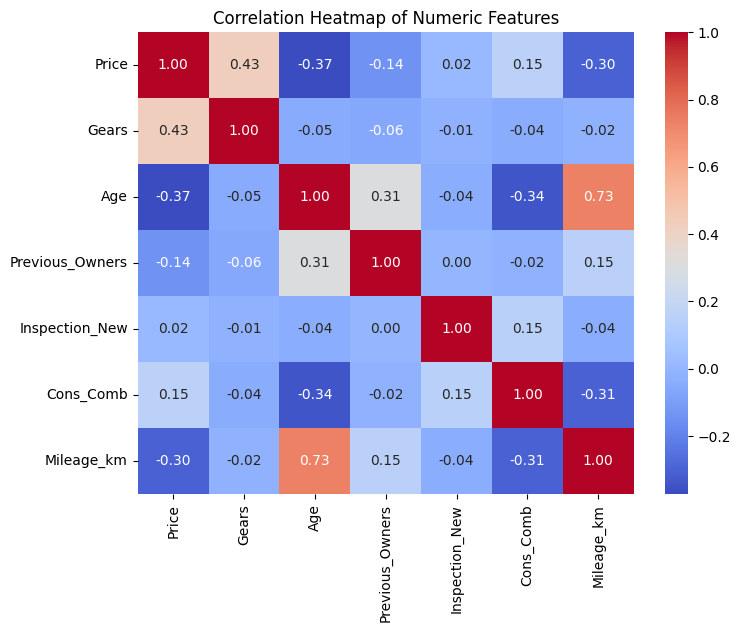


Correlation with Price:
Price              1.000000
Gears              0.429813
Cons_Comb          0.154471
Inspection_New     0.017333
Previous_Owners   -0.143275
Mileage_km        -0.304024
Age               -0.373197
Name: Price, dtype: float64


In [44]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Print some key correlations for Price
if "Price" in corr_matrix.columns:
    print("\nCorrelation with Price:")
    print(corr_matrix["Price"].sort_values(ascending=False))

## 4.4: Statistical Testing

In [45]:
from scipy.stats import kruskal, mannwhitneyu
import itertools

In [46]:
price_col = [c for c in clean.columns if 'price' in c.lower()]
body_col  = [c for c in clean.columns if 'body' in c.lower()]

if not price_col or not body_col:
    raise ValueError("Cannot find 'price' or 'body' column. Check column names.")
price_col = price_col[0]
body_col  = body_col[0]

styles = clean[body_col].dropna().unique()
groups = [clean.loc[clean[body_col]==s, price_col].dropna().values for s in styles]

if len(groups) >= 2:
    H, p_global = kruskal(*groups)
    print(f"Kruskal–Wallis H={H:.3f}, p={p_global:.3g}")
else:
    print("Not enough body-style groups for Kruskal–Wallis.")

pairs = []
for a, b in itertools.combinations(styles, 2):
    a_vals = clean.loc[clean[body_col]==a, price_col].dropna().values
    b_vals = clean.loc[clean[body_col]==b, price_col].dropna().values
    if len(a_vals)>0 and len(b_vals)>0:
        u, p = mannwhitneyu(a_vals, b_vals, alternative='two-sided')
        pairs.append((a, b, p))

m = len(pairs) if pairs else 1
print("\nPairwise tests (Mann-Whitney) with Bonferroni adjust:")
for a, b, p in sorted(pairs, key=lambda x: x[2]):
    p_adj = min(p * m, 1.0)
    print(f"{a} vs {b}: p={p:.3g}, p_adj={p_adj:.3g}")

Kruskal–Wallis H=545.307, p=1.06e-116

Pairwise tests (Mann-Whitney) with Bonferroni adjust:
sedan vs hatchback: p=9.16e-106, p_adj=9.16e-105
wagon vs hatchback: p=3.72e-81, p_adj=3.72e-80
wagon vs hardtop: p=0.000546, p_adj=0.00546
sedan vs hardtop: p=0.000844, p_adj=0.00844
hatchback vs convertible: p=0.000949, p_adj=0.00949
hardtop vs convertible: p=0.00131, p_adj=0.0131
sedan vs convertible: p=0.00433, p_adj=0.0433
wagon vs convertible: p=0.0141, p_adj=0.141
hatchback vs hardtop: p=0.21, p_adj=1
sedan vs wagon: p=0.47, p_adj=1
